In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('https://bitly.com/gradescsv')

pandas 也可以做基本的數據分析。

畫出國文成績。

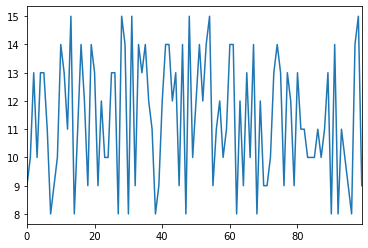

In [3]:
df.國文.plot()

因為是離散型的成績，畫成折線圖不太合理，改用長條圖。

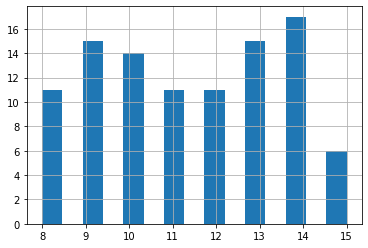

In [4]:
df.國文.hist(bins=15)

用 DataFrame 也可以取平均。

In [5]:
df.國文.mean()

11.39

取標準差。

In [6]:
df.國文.std()

2.1968526614594834

簡單的統計數據。

In [7]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


各科成績的相關性。

In [8]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


In [9]:
df.國文.corr(df.數學)

-0.3108989822179331

新增欄位，要告訴他怎麼計算。

In [10]:
df['總級分'] = df[['國文', '英文', '數學', '社會', '自然']].sum()

In [11]:
df['總級分'] = df.sum()

沒顯示出來？

In [12]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,NaN
1,胡玉華,10,10,10,8,9,NaN
2,黃淑婷,13,15,8,11,14,NaN
3,陳上紫,10,10,8,9,14,NaN
4,崔靜成,13,12,14,12,13,NaN


根據哪個軸加起來很重要。

In [13]:
df['總級分'] = df.sum(axis=1)

In [14]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


根據總級分從大到小，對表格排序。

In [15]:
df.sort_values(by='總級分', ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分
80,施雅鈴,13,15,12,13,13,66
12,李正偉,11,15,11,14,15,66
54,陳怡潔,15,15,9,15,11,65
25,蔡亦瑄,13,13,14,13,12,65
57,胡淳茜,12,15,14,13,11,65
37,曾怡君,11,12,15,13,14,65
48,陳怡婷,15,14,12,9,15,65
64,俞志峰,9,14,13,14,15,65
83,李士賢,10,14,15,13,13,65
87,趙偉希,10,13,14,13,15,65


In [16]:
df['主科'] = df.數學 * 1.5 + df.英文

In [17]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,主科
0,劉俊安,9,10,15,10,13,57,32.5
1,胡玉華,10,10,10,8,9,47,25.0
2,黃淑婷,13,15,8,11,14,61,27.0
3,陳上紫,10,10,8,9,14,51,22.0
4,崔靜成,13,12,14,12,13,64,33.0


根據好幾行做排序，要指定優先順序，這裡是先看主科成績。

In [18]:
df.sort_values(by = ['主科', '總級分'], ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,主科
73,吳志遠,13,15,15,8,8,59,37.5
83,李士賢,10,14,15,13,13,65,36.5
57,胡淳茜,12,15,14,13,11,65,36.0
36,詹威德,12,13,15,10,14,64,35.5
70,葉儀依,9,13,15,8,14,59,35.5
68,劉麗芬,8,14,14,14,14,64,35.0
66,邱盈俊,10,14,14,13,8,59,35.0
37,曾怡君,11,12,15,13,14,65,34.5
24,陳竹伯,10,12,15,10,14,61,34.5
76,周育霖,9,12,15,13,12,61,34.5
